In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#text modulus
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
#scikit-learn modulus
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#ignore warning
import warnings
warnings.filterwarnings('ignore')

#Load dataset
-read the sms spam dataset

In [258]:
df=pd.read_csv('/content/spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [259]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [260]:
#shaape of dataset
df.shape

(5572, 5)

In [261]:
#drop the unnamed column which is unnessary
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [262]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Rename the column

In [263]:
#rename the column
df=df.rename(columns={'v1':'label','v2':'message'})

In [264]:
df.sample(5)

,label,message
3408,ham,Whats that coming over the hill..... Is it a m...
78,ham,Does not operate after &lt;#&gt; or what
4925,ham,"Oh yes, why is it like torture watching england?"
1173,ham,ÌÏ dun need to pick ur gf?
2693,ham,All these nice new shirts and the only thing I...


In [265]:
#check the null value
df.isnull().sum()

,0
label,0
message,0


In [266]:
# check for duplicate values
df.duplicated().sum()

403

In [267]:
# remove duplicates only keeping first one message
df = df.drop_duplicates(keep='first')

In [268]:
# check for duplicate values
df.duplicated().sum()

0

In [269]:
#description
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [270]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4516   4516  Go until jurong point, crazy.. Available only ...    1
spam      653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [271]:
#unique iteam in label columns
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [272]:
#check the value_counts in label column
df['label'].value_counts()

,count
label,
ham,4516
spam,653


In [273]:
#check the spam data message difference
df[df['label']=='spam'].head()

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [274]:
#check the duplicate data after troping all data
df.duplicated().sum()

0

In [275]:
#check the shape the of data after all treating
df.shape

(5169, 2)

In [276]:
#create length of sms
df['length']=df['message'].apply(len)

#visalize dataset

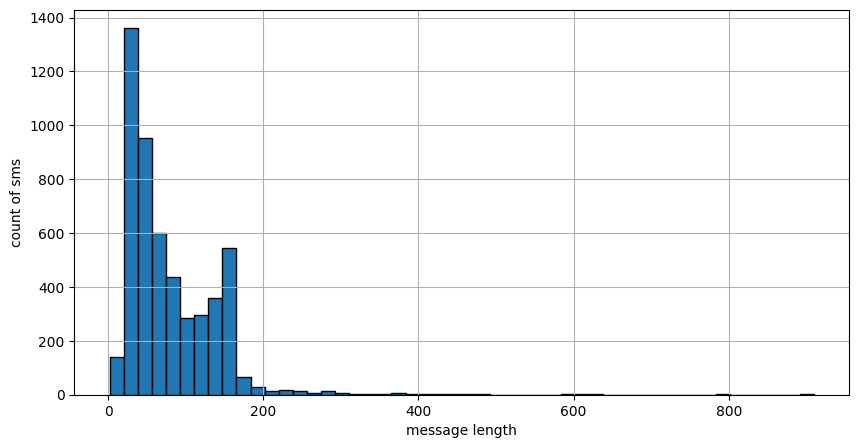

In [277]:
# distribution of message length
plt.xlabel('message length')
df['length'].hist(bins=50, edgecolor='black', figsize=(10,5))
plt.xlabel('message length')
plt.ylabel('count of sms')
#save the chart image
plt.savefig('length_sms_chart.png')
plt.show()

In [278]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#spam and ham message length distribution comparision

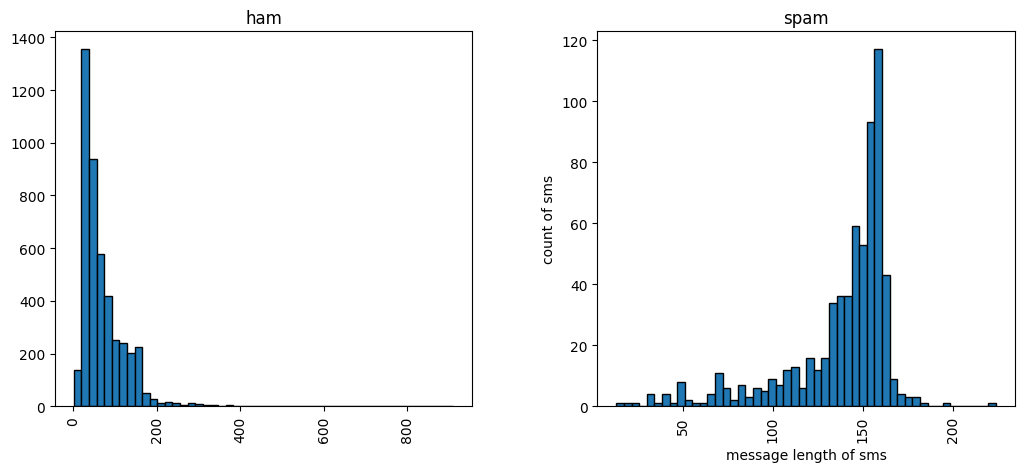

In [279]:
df.hist(column='length',by='label',bins=50,figsize=(12,5),
              edgecolor='black')
#save image of comparision of length of sms on basics of label
plt.xlabel('message length of sms')
plt.ylabel('count of sms')
plt.savefig('length_of_label.png')
plt.show()

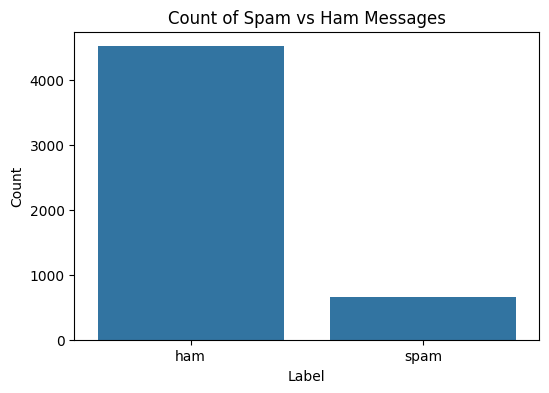

In [280]:
# Countplot of labels
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label')
plt.title('Count of Spam vs Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

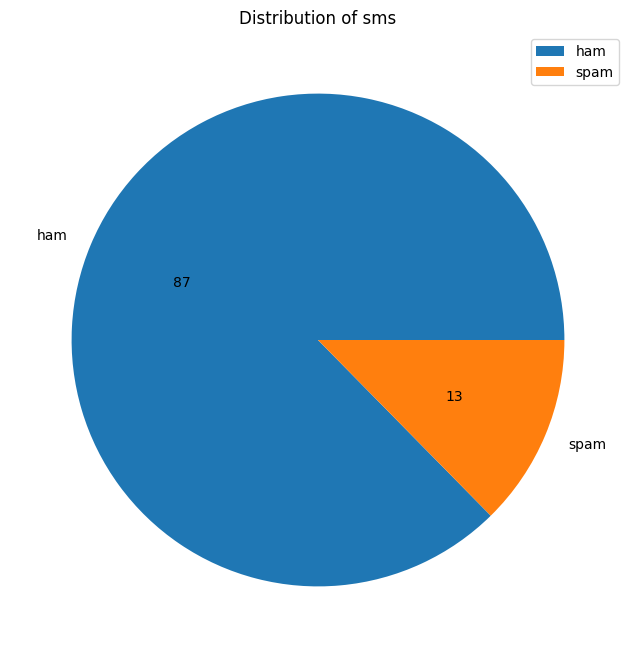

In [281]:
#% of sms distribution spam and ham in pie chart
plt.figure(figsize=(8,8))
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%1.0f")
plt.title('Distribution of sms')
plt.legend()
plt.savefig('pie_chart_sms.png')
plt.show()

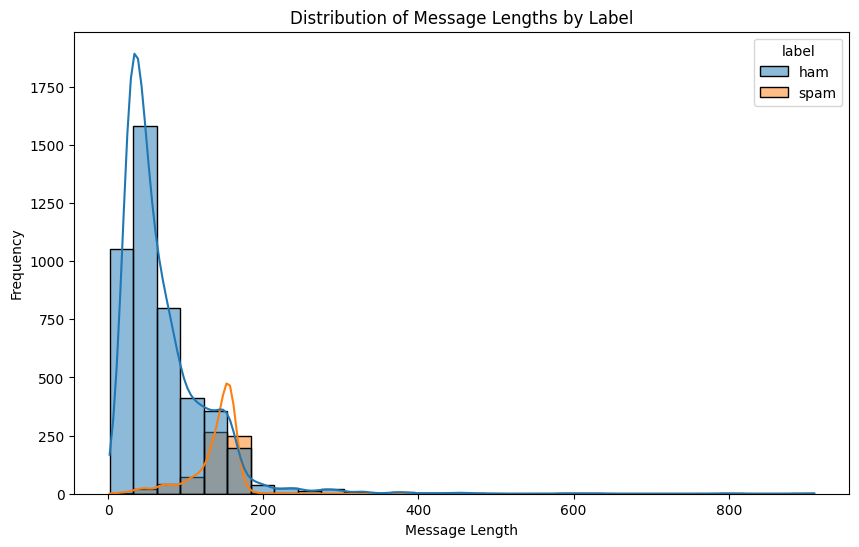

In [282]:
# Histogram of message lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length', hue='label', kde=True, bins=30)
plt.title('Distribution of Message Lengths by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

In [283]:
#!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#Create new column from this  message column :-count_sentence,count_word

In [284]:
# number of words from the messsage as new column
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [285]:
#number of sentence in message as new column
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [286]:
df.head()

,label,message,length,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


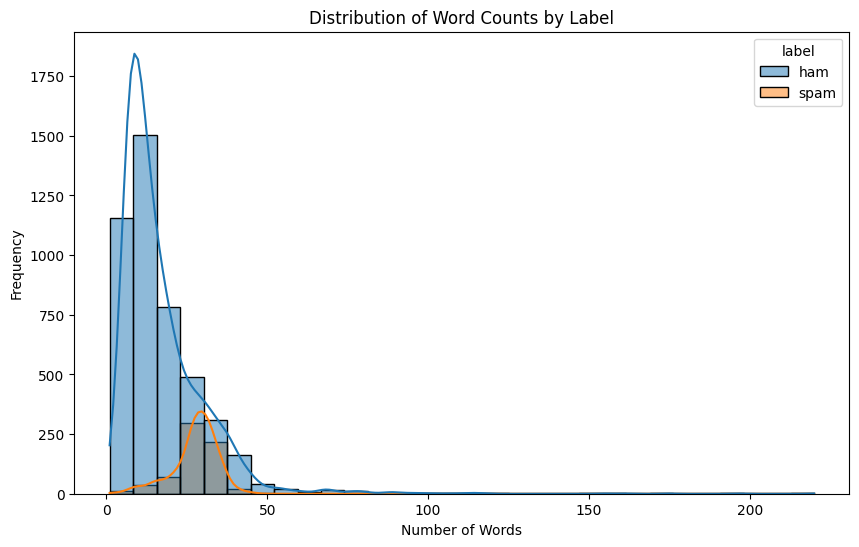

In [287]:
# Histogram of word counts
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='num_words', hue='label', kde=True, bins=30)
plt.title('Distribution of Word Counts by Label')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [288]:
#check the data types for correlation
df.dtypes

,0
label,object
message,object
length,int64
num_words,int64
num_sentences,int64


##***Converting our labels to numeric labels***
# ham = 0 and spam = 1
ham=Not Spam

In [289]:
df['label']=df.label.map({'ham':0,'spam':1})
df.head()

,label,message,length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


##Correlation Features

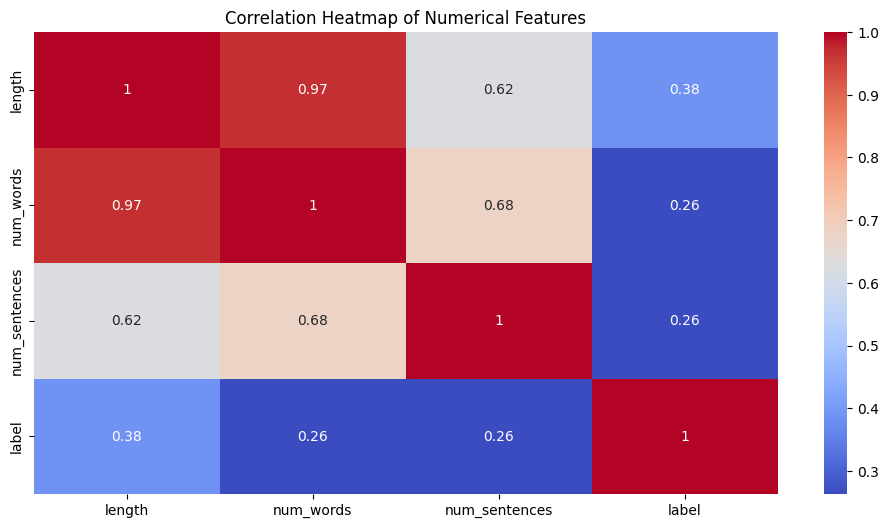

In [290]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[['length', 'num_words', 'num_sentences','label']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

#top word mostly use in the message in Spam sms

In [291]:
spam_corpus = []
for msg in df[df['label'] == 1]['message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

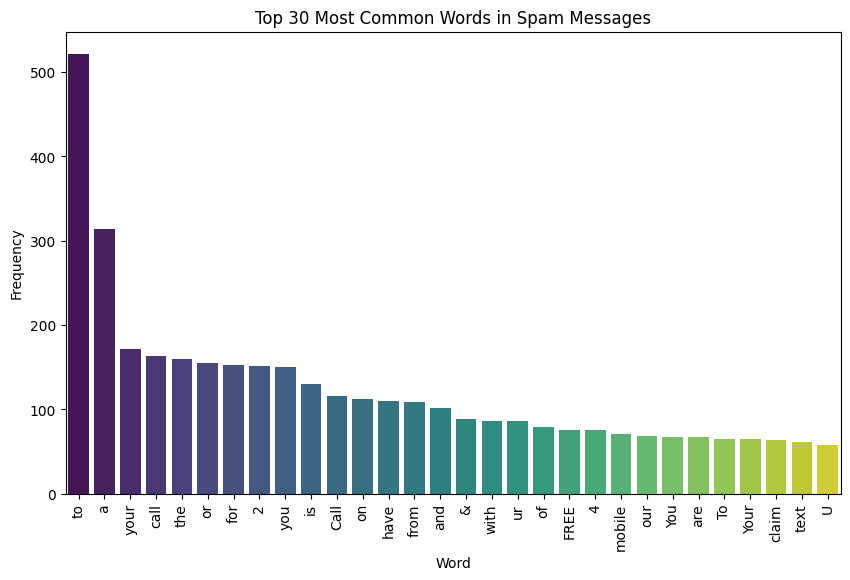

In [292]:
# Counter will count the frequency of each word
spam_corpus_counts = Counter(spam_corpus)

# Convert the Counter object to a DataFrame
spam_df = pd.DataFrame(spam_corpus_counts.most_common(30), columns=['word', 'frequency'])

# Plot the barplot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='frequency', data=spam_df,palette='viridis')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

#top word mostly use in the message in ham sms

In [293]:
ham_corpus = []
for msg in df[df['label'] == 0]['message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

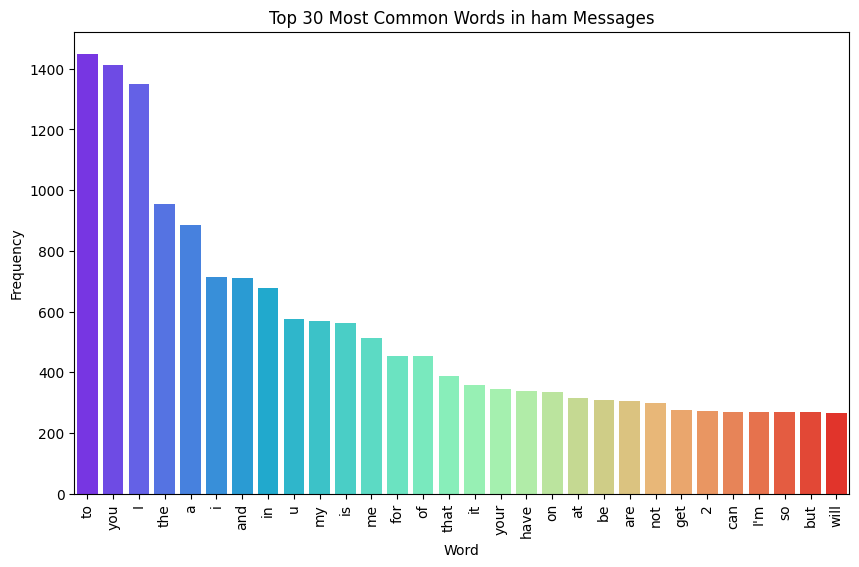

In [294]:
# Counter will count the frequency of each word
ham_corpus_counts = Counter(ham_corpus)

# Convert the Counter object to a DataFrame
ham_df = pd.DataFrame(ham_corpus_counts.most_common(30), columns=['word', 'frequency'])

# Plot the barplot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='frequency', data=ham_df,palette='rainbow')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in ham Messages')
plt.show()

In [295]:
df.head()

,label,message,length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#use a CountVectorizer for converting text data into a matrix of token counts


In [296]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [297]:
X=df['message']
# Target (y)
y=df['label']

In [298]:
print("X_shape-",X.shape,"y_shape:-",y.shape)

X_shape- (5169,) y_shape:- (5169,)


In [299]:
#fit_transform the X message data in CountVectorizer model
X=cv.fit_transform(X)

#How cv work example to convert sentence in matrix:-
-Detailed Breakdown:\
1.First Sentence: "I love machine learning."

It contains the words: 'love', 'machine', and 'learning'.\
So, the corresponding row is [0 0 0 0 1 1 1 0].\
2.Second Sentence: "Machine learning is fascinating."

It contains the words: 'machine', 'learning', 'is', and 'fascinating'.\
So, the corresponding row is [0 1 0 1 1 0 1 0].\
3.Third Sentence: "I love coding in Python."

It contains the words: 'love', 'coding', 'in', and 'python'.\
So, the corresponding row is [1 0 1 0 0 1 0 1].

In [300]:
#check X fit in matrix form
X

<5169x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 68018 stored elements in Compressed Sparse Row format>

In [301]:
#check the new shape of X
X.shape

(5169, 8672)

#Spliting the datset in Train and test dataset

In [302]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [303]:
#check the shape of train data
X_train.shape

(4135, 8672)

#Building Model
-use all Classifier model\
-find the best model\
-use for loop to train all model at a time \
-best model save it using pickle

In [304]:
# List of classifiers
classifiers = {
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

In [305]:
# Dictionary to store the accuracy of each model
model_accuracies = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]
best_model = classifiers[best_model_name]

Support Vector Machine Accuracy: 0.9768
Decision Tree Accuracy: 0.9700
Multinomial Naive Bayes Accuracy: 0.9826
K-Nearest Neighbors Accuracy: 0.9275
Random Forest Accuracy: 0.9729
AdaBoost Accuracy: 0.9768
Bagging Accuracy: 0.9691
Extra Trees Accuracy: 0.9797
Gradient Boosting Accuracy: 0.9662
XGBoost Accuracy: 0.9758


In [306]:
#best model among all this model
print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:0.2f}")


Best Model: Multinomial Naive Bayes with Accuracy: 0.98


#Export the model using Pickle

In [307]:
import pickle

In [308]:
pickle.dump(best_model,open('spam_detector.pkl','wb'))

In [309]:
#also save the cv(countVectorizer model) for converting the row sentence in matrix form
pickle.dump(cv,open('Vectorizer.pkl','wb'))

#load model file

In [310]:
spm=pickle.load(open('spam_detector.pkl','rb'))

check which model load in this pkl file

In [311]:
spm

MultinomialNB()

#Load CV model

In [312]:
cvf=pickle.load(open('Vectorizer.pkl','rb'))

In [313]:
cvf

CountVectorizer()

#Check the model working or not by using random input


In [330]:
sms="You win 10 Dollar"   #take spam message to check model working or not

In [327]:
#sms="Hi im Ranjan"

In [331]:
data=[sms]
#transfom the sentence in matrix use cv(vectorizer) model
#cvf=cv model that we had loaded recently
vect=cvf.transform(data).toarray()

In [332]:
#predict input data is spam=1 or ham=0
#spm=model that we had loaded recently
print(spm.predict(vect))

[1]


#Model is working properly now we can deploy it any where we want
-we can also make it a single pkl file model by using pipeline